Neural Network for Linearly and Non-Linearly Separable Datasets

Objective:
This script trains a simple neural network to classify linearly and non-linearly separable datasets.
It first observes the failure of a single-layer perceptron (without a hidden layer) on a non-linearly separable dataset,
then adds hidden layers and observes the improvement.


In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


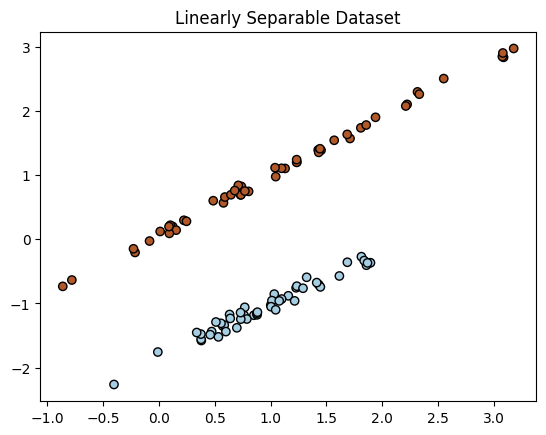

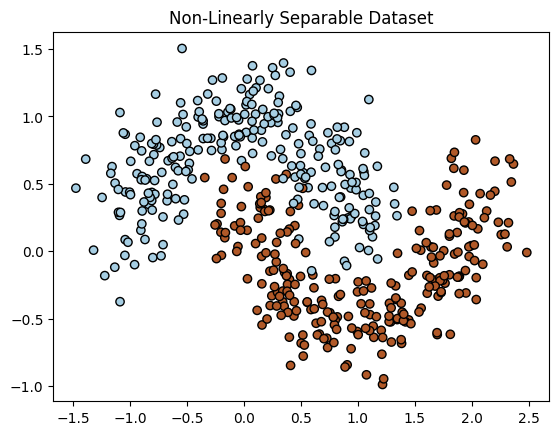

In [11]:
# Generate datasets
X_linear, y_linear = make_classification(n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_nonlinear, y_nonlinear = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split datasets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear, y_nonlinear, test_size=0.3, random_state=42)

# Standardize datasets
scaler = StandardScaler()
X_train_linear = scaler.fit_transform(X_train_linear)
X_test_linear = scaler.transform(X_test_linear)
X_train_nonlinear = scaler.fit_transform(X_train_nonlinear)
X_test_nonlinear = scaler.transform(X_test_nonlinear)

# Plot datasets
def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
    plt.title(title)
    plt.show()

plot_dataset(X_linear, y_linear, "Linearly Separable Dataset")
plot_dataset(X_nonlinear, y_nonlinear, "Non-Linearly Separable Dataset")

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [12]:

# Neural network implementation
def train_neural_network(X, y, hidden_layers=None, activation="relu", epochs=100, lr=0.01):
    np.random.seed(42)
    layers = [X.shape[1]] + (hidden_layers if hidden_layers else []) + [1]
    weights = [np.random.randn(layers[i], layers[i + 1]) * 0.1 for i in range(len(layers) - 1)]
    biases = [np.zeros((1, layers[i + 1])) for i in range(len(layers) - 1)]
    activations = [relu if activation == "relu" else sigmoid for _ in range(len(weights))]
    activation_derivatives = [relu_derivative if activation == "relu" else sigmoid_derivative for _ in range(len(weights))]
    loss_history, acc_history = [], []

    for epoch in range(epochs):
        a = X
        activations_cache, zs_cache = [a], []
        
        for W, b, act in zip(weights, biases, activations):
            z = np.dot(a, W) + b
            a = act(z)
            zs_cache.append(z)
            activations_cache.append(a)
        
        y_pred = activations_cache[-1]
        loss = binary_cross_entropy(y, y_pred)
        loss_history.append(loss)
        # acc_history.append(accuracy(y, (y_pred > 0.5).astype(int)))
        
        dz = y_pred - y.reshape(-1, 1)
        for i in range(len(weights) - 1, -1, -1):
            dw = np.dot(activations_cache[i].T, dz) / len(y)
            db = np.sum(dz, axis=0, keepdims=True) / len(y)
            if i > 0:
                dz = np.dot(dz, weights[i].T) * activation_derivatives[i - 1](zs_cache[i - 1])
            weights[i] -= lr * dw
            biases[i] -= lr * db
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")
    

  
    
    return weights, biases

Training single-layer perceptron on linearly separable dataset...
Epoch 0/100 - Loss: 0.6934
Epoch 10/100 - Loss: 0.7153
Epoch 20/100 - Loss: 0.7526
Epoch 30/100 - Loss: 0.7913
Epoch 40/100 - Loss: 0.8281
Epoch 50/100 - Loss: 0.8626
Epoch 60/100 - Loss: 0.8949
Epoch 70/100 - Loss: 0.9253
Epoch 80/100 - Loss: 0.9540
Epoch 90/100 - Loss: 0.9812
Training single-layer perceptron on non-linearly separable dataset...
Epoch 0/100 - Loss: 0.6935
Epoch 10/100 - Loss: 0.7235
Epoch 20/100 - Loss: 0.7736
Epoch 30/100 - Loss: 0.8255
Epoch 40/100 - Loss: 0.8739
Epoch 50/100 - Loss: 0.9178
Epoch 60/100 - Loss: 0.9572
Epoch 70/100 - Loss: 0.9926
Epoch 80/100 - Loss: 1.0246
Epoch 90/100 - Loss: 1.0536
Training multi-layer perceptron on non-linearly separable dataset...
Epoch 0/100 - Loss: 7.3554
Epoch 10/100 - Loss: 0.7576
Epoch 20/100 - Loss: 0.7008
Epoch 30/100 - Loss: 0.6942
Epoch 40/100 - Loss: 0.6933
Epoch 50/100 - Loss: 0.6932
Epoch 60/100 - Loss: 0.6932
Epoch 70/100 - Loss: 0.6933
Epoch 80/100 -

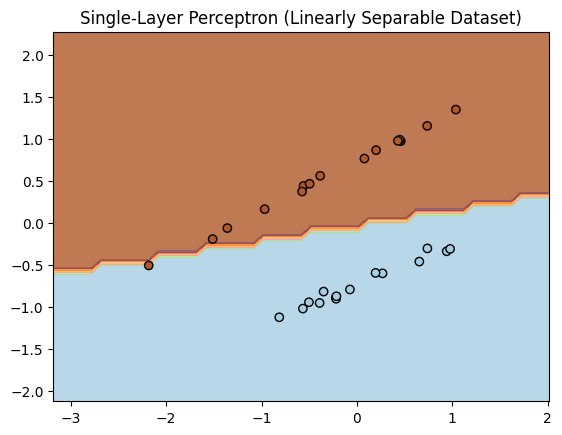

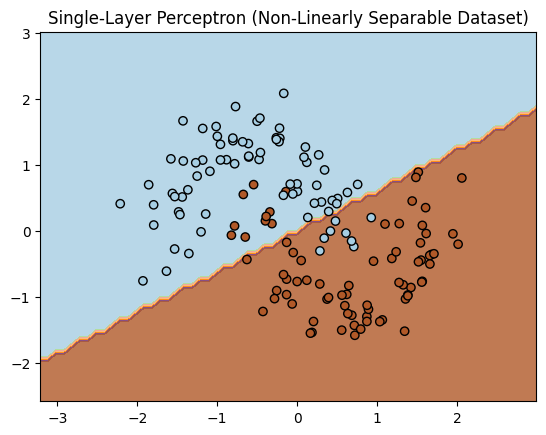

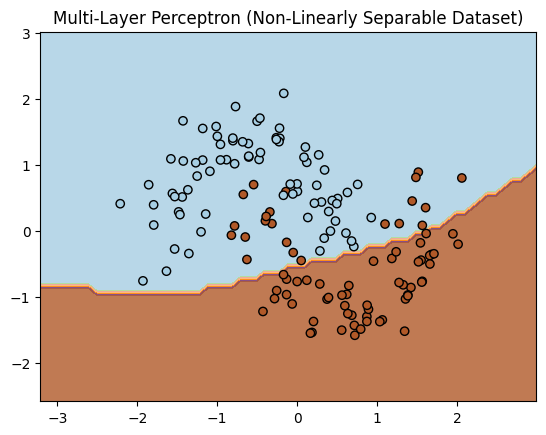

In [13]:

# Train models
print("Training single-layer perceptron on linearly separable dataset...")
weights_linear, biases_linear = train_neural_network(X_train_linear, y_train_linear, hidden_layers=None, activation="sigmoid", epochs=100, lr=0.1)
print("Training single-layer perceptron on non-linearly separable dataset...")
weights_nonlinear, biases_nonlinear = train_neural_network(X_train_nonlinear, y_train_nonlinear, hidden_layers=None, activation="sigmoid", epochs=100, lr=0.1)
print("Training multi-layer perceptron on non-linearly separable dataset...")
weights_nonlinear_hidden, biases_nonlinear_hidden = train_neural_network(X_train_nonlinear, y_train_nonlinear, hidden_layers=[10, 8], activation="relu", epochs=100, lr=0.1)

# Evaluate models with decision boundaries
def plot_decision_boundary(X, y, weights, biases, activation="relu", title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, biases, activation)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test_linear, y_test_linear, weights_linear, biases_linear, activation="sigmoid", title="Single-Layer Perceptron (Linearly Separable Dataset)")
plot_decision_boundary(X_test_nonlinear, y_test_nonlinear, weights_nonlinear, biases_nonlinear, activation="sigmoid", title="Single-Layer Perceptron (Non-Linearly Separable Dataset)")
plot_decision_boundary(X_test_nonlinear, y_test_nonlinear, weights_nonlinear_hidden, biases_nonlinear_hidden, activation="relu", title="Multi-Layer Perceptron (Non-Linearly Separable Dataset)")
